In [ ]:
import pandas as pd
import nltk
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_files

from sklearn.svm import LinearSVC
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

# Getting the Data

In [3]:
df_full=pd.read_csv('reviews.csv')
df=df_full[:500]

In [5]:
df['Score'].value_counts()

5    339
4     70
3     37
1     36
2     18
Name: Score, dtype: int64

# Preprocessing

In [ ]:
def preprocess(text):
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Lowercase
    text = text.lower()
    
    # Tokenization
    words = word_tokenize(text)
    
    # Stopword removal and Lemmatization
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    # Join the words back into a single string
    text = ' '.join(words)
    
    return text




In [ ]:

df['PreprocessedText'] = [preprocess(text) for text in df['Text']]


C:\Users\Noel\AppData\Local\Temp\ipykernel_10704\1012049759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PreprocessedText'] = [preprocess(text) for text in df['Text']]


In [11]:
X=df['PreprocessedText']
y=df['Score']

# Feature Extraction

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=15,test_size=0.2)
print(len(X_train),len(X_test),len(y_train),len(y_test))

400 100 400 100


In [ ]:


# BoW vectorization
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(max_features=50)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

pd.DataFrame(X_train_tfidf.toarray(),columns=tfidf_vectorizer.get_feature_names_out())

,also,amazon,bag,best,better,box,brand,buy,cat,chip,...,tea,time,tried,try,use,used,water,well,would,year
0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.000000,0.0,0.662740,0.000000,0.000000,0.00000,0.238138,0.000000,0.0,0.623891,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.281844,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.260818,0.000000,0.000000,0.000000,0.0,0.000000
3,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.442675,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,0.141722,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.131149,0.0,0.0,0.131149,0.142828,0.000000,0.000000,0.0,0.279188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000000,0.0,0.000000,0.402659,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.423032,0.460701,0.000000,0.000000,0.0,0.450271
396,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.271612,0.0,0.000000,...,0.000000,0.583984,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
397,0.000000,0.0,0.000000,0.000000,0.434009,0.00000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.517391,0.000000,0.0,0.000000
398,0.000000,0.0,0.092142,0.000000,0.000000,0.22702,0.000000,0.000000,0.0,0.000000,...,0.908081,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.105221,0.0,0.103641


# Naive bayes

In [ ]:
# Naive Bayes classifier
naive_bayes_model_cv = MultinomialNB()
naive_bayes_model_cv.fit(X_train_vec, y_train)

y_test_pred = naive_bayes_model_cv.predict(X_test_vec)

accuracy_val = accuracy_score(y_test, y_test_pred)
print(f"Validation Accuracy: {accuracy_val:.2f}")

Validation Accuracy: 0.62


In [ ]:
# Naive Bayes classifier on TF-idf
naive_bayes_model_tf = MultinomialNB()
naive_bayes_model_tf.fit(X_train_tfidf, y_train)

y_test_pred = naive_bayes_model_tf.predict(X_test_tfidf)

accuracy_val = accuracy_score(y_test, y_test_pred)
print(f"Validation Accuracy: {accuracy_val:.2f}")

Validation Accuracy: 0.63


# SVM

In [ ]:
# Linear SVM classifier
svm_classifier_cv = LinearSVC()
svm_classifier_cv.fit(X_train_vec, y_train)

y_test_pred_cv = svm_classifier_cv.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_test_pred_cv)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_test_pred_cv))

Accuracy: 0.60
Classification Report:
              precision    recall  f1-score   support

           1       0.30      0.75      0.43         4
           2       0.00      0.00      0.00         6
           3       0.33      0.08      0.13        12
           4       0.17      0.13      0.15        15
           5       0.73      0.86      0.79        63

    accuracy                           0.60       100
   macro avg       0.31      0.36      0.30       100
weighted avg       0.54      0.60      0.55       100



In [ ]:
# Linear SVM classifier
svm_classifier_tf = LinearSVC()
svm_classifier_tf.fit(X_train_tfidf, y_train)

y_test_pred_tf = svm_classifier_tf.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_test_pred_tf)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_test_pred_tf))

Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        12
           4       0.20      0.07      0.10        15
           5       0.62      0.90      0.74        63

    accuracy                           0.58       100
   macro avg       0.16      0.19      0.17       100
weighted avg       0.42      0.58      0.48       100



C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Using Transformers

In [19]:
df=df_full[:500]

In [22]:
sia=SentimentIntensityAnalyzer()

In [23]:
sia.polarity_scores("I am happy")

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [ ]:
df['res'] = df['Text'].apply(lambda x: sia.polarity_scores(x))

print(df)

      Id   ProductId          UserId                      ProfileName  \
0      1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1      2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2      3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3      4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4      5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
..   ...         ...             ...                              ...   
495  496  B000G6RYNE   APGAA43E3WPN7                           Darren   
496  497  B000G6RYNE    ABR7HU5H1KNE                            Keith   
497  498  B000G6RYNE   AJQD2WWJYOYFQ                          bubbles   
498  499  B000G6RYNE  A16YH487W9ZYO0                 Bruce G. Lindsay   
499  500  B000G6RYNE   A83YQC1XOU4CS                         J. Baker   

     HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                       1                       1  

C:\Users\Noel\AppData\Local\Temp\ipykernel_10704\472529062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res'] = df['Text'].apply(lambda x: sia.polarity_scores(x))


In [25]:
df=df[['Id',"Score",'Text','res']]

In [ ]:
df[['neg', 'neu', 'pos','compound']] = df['res'].apply(lambda x: pd.Series([x['neg'], x['neu'], x['pos'],x['compound']]))

df = df.drop('res', axis=1)

print(df)

      Id  Score                                               Text    neg  \
0      1      5  I have bought several of the Vitality canned d...  0.000   
1      2      1  Product arrived labeled as Jumbo Salted Peanut...  0.138   
2      3      4  This is a confection that has been around a fe...  0.091   
3      4      2  If you are looking for the secret ingredient i...  0.000   
4      5      5  Great taffy at a great price.  There was a wid...  0.000   
..   ...    ...                                                ...    ...   
495  496      5  i rarely eat chips but i saw these and tried t...  0.000   
496  497      5  This is easily the best potato chip that I hav...  0.059   
497  498      4  Kettle Chips Spicy Thai potato chips have the ...  0.025   
498  499      4  Okay, I should not eat potato chips, nor shoul...  0.041   
499  500      5  I don't write very many reviews but I have to ...  0.000   

       neu    pos  compound  
0    0.695  0.305    0.9441  
1    0.862  0.0

C:\Users\Noel\AppData\Local\Temp\ipykernel_10704\2043255299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['neg', 'neu', 'pos','compound']] = df['res'].apply(lambda x: pd.Series([x['neg'], x['neu'], x['pos'],x['compound']]))
C:\Users\Noel\AppData\Local\Temp\ipykernel_10704\2043255299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['neg', 'neu', 'pos','compound']] = df['res'].apply(lambda x: pd.Series([x['neg'], x['neu'], x['pos'],x['compound']]))
C:\Users\Noel\AppData\Local\Temp\ipykernel_1

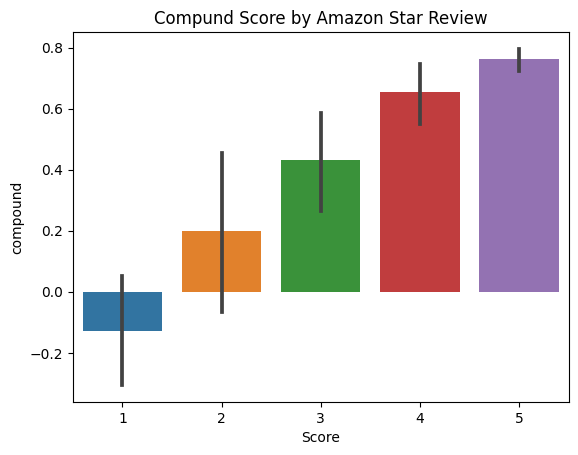

In [28]:
ax = sns.barplot(data=df, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

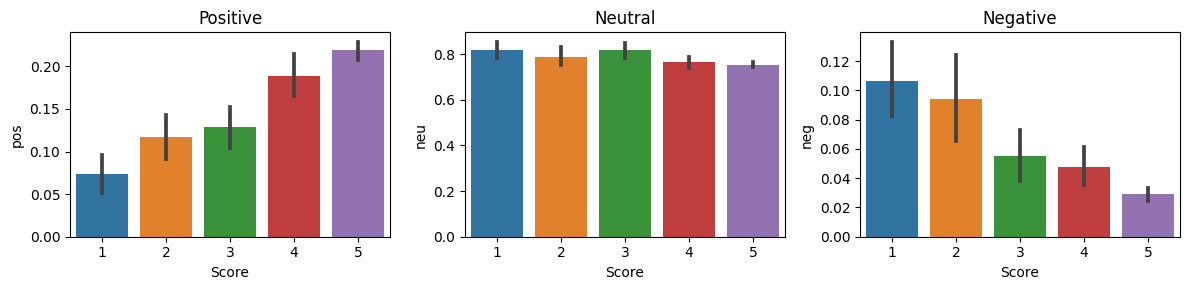

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=df, x='Score', y='pos', ax=axs[0])
sns.barplot(data=df, x='Score', y='neu', ax=axs[1])
sns.barplot(data=df, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [31]:
MODEL = f"finiteautomata/bertweet-base-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:

example=df['Text'][0]
print(example)
scores_dict=sia.polarity_scores(example)
print(scores_dict)
if scores_dict['compound']>0.1:
    sentiment_label="Positive"
elif scores_dict['compound']<0:
    sentiment_label="Negative"
else:
    sentiment_label="Neutral"
print("Predicted sentiment:", sentiment_label)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}
Predicted sentiment: Positive


In [ ]:

encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'Negative' : scores[0],
    'Neutral' : scores[1],
    'Positive' : scores[2]
}
print(scores_dict)

sentiment_label = max(scores_dict, key=scores_dict.get)

print("Predicted sentiment:", sentiment_label)

{'bert_neg': 0.0015636327, 'bert_neu': 0.0064980104, 'bert_pos': 0.9919383}
Predicted sentiment: bert_pos
